## Generate Figures 2-7 for "Existence of phase-cohesive solutions of the lossless power flow equations".

In [1]:
from core import *

Figure 1: the objective function is continuous.

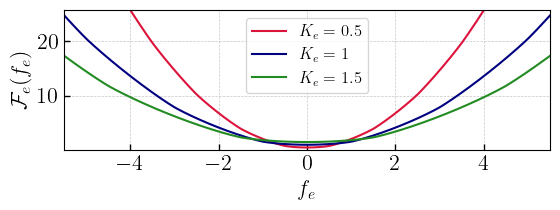

In [ ]:
plot_Fig2(filename="Figure2.pdf")

Figure 3: Error bounds around linear solution, demonstrated for Case 30.

(a) Dots and lines show the ratio $\psi^\circ_e = f_e^\circ/K_e$ in the DC approximation for each edge $e$ in the lossless Case30 test case. The shaded area shows the region of trust provided by corollary 2.
The difference between the linear $\psi^\circ$ and nonlinear $\psi^*$ solution falls within the error, shown for $p_f=1$ (b) and $p_f=8$ (c).

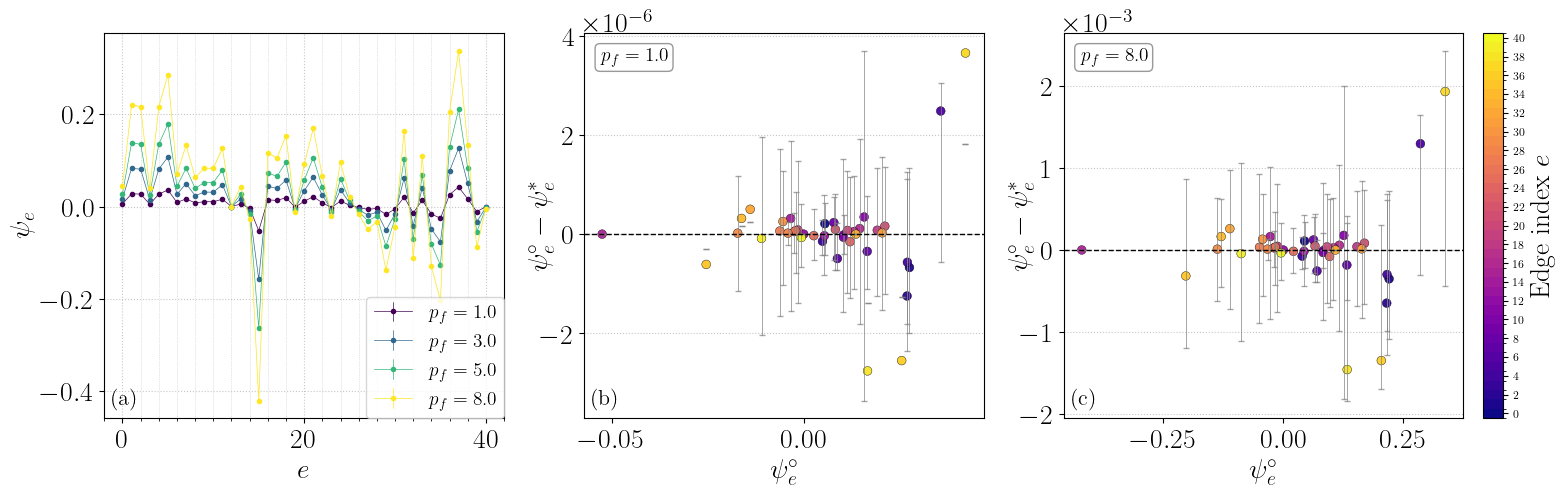

In [2]:
plot_region_of_trust(pow_fac_list_a=[1.0, 3.0, 5.0, 8.0], pow_fac_b=1.0, pow_fac_c=8.0, casenum = 30, filename='Figure3.pdf')

We can do the same for Case 118, but there is too much data so the plot is difficult to read.

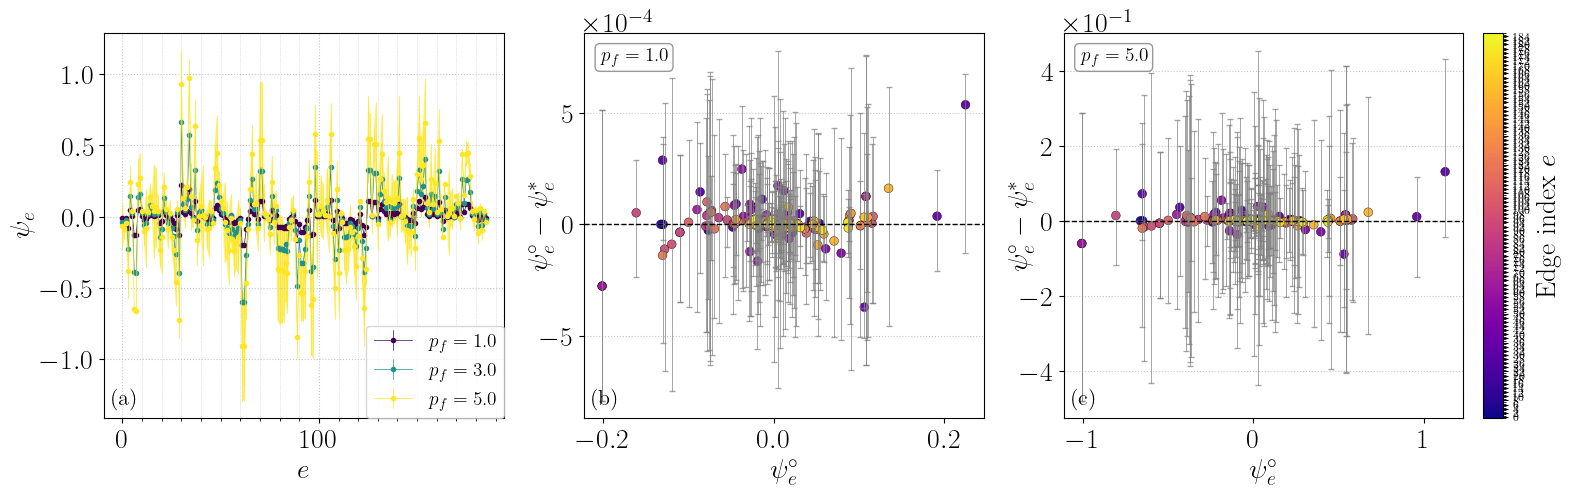

In [4]:
plot_region_of_trust(pow_fac_list_a=[1.0, 3.0, 5.0], pow_fac_b=1.0, pow_fac_c=5.0, casenum = 118, filename = None)

Figure 4: Now we study the effect of different power injections, allowing us also to compare the exact phase cohesiveness $\sin(\gamma)$ with the upper bound $\Psi= \max_{e \in \mathcal{E}} \max_{\pm} \left| \frac{f_e^\circ - \kappa_e \pm \chi_e}{K_e} \right|. $

We will see below
(a) Comparison for increasing overall grid loads $p_f$ with the standard distribution of generation and load.
(b) Average over 200 random realizations of the power injections $\vec p$.
(c) Histogram of the ratio $\frac{\Psi}{\sin \gamma}$ for $2 \cdot 10^5$ random realizations.
for both Case 30 and Case 118.


For the figure used in the paper, we will load pre-calculated data on a larger sample.
Nevertheless, the code in the cell below the following to figures could be evaluated to calculate this data.

In [5]:
%%script false --no-raise-error
ctx = build_case_context(casenum=30)

# Panel (a): fast to calculate
pow_fac_list_a_30 = 1.0 + np.arange(0, 19) * 0.5
fig4a = compute_fig4a(ctx, pow_fac_list_a_30)
S1def = fig4a["S1"]
S2def = fig4a["S2"]

# Load data from files and compute data for panel (b)
p_coeff_list = load_p_coeff_list_csv("data_for_plots/pcoeff_case30_pfmax10.00_values230.csv")
pow_fac_list_b_30 = 1.0 + np.arange(0, 19) * 0.5
fig4b = compute_fig4b(ctx, pow_fac_list_b_30, p_coeff_list, N_target = 200)
avg_S1 = fig4b["S1"]
avg_S2 = fig4b["S2"]

# Build histogram from precomputed loaded data
ratio = load_ratio_hist_csv("data_for_plots/ratio_casecase30_pf1.00_values200000.csv")
res = stats.relfreq(ratio, numbins=40, defaultreallimits=[float(np.min(ratio)), float(np.max(ratio))])
hist_x = res.lowerlimit + np.linspace(0, res.binsize * res.frequency.size, res.frequency.size)

# Plot Fig. 4 (a,b,c)
plot_Fig_4_panels(
    pow_fac_list_a=fig4a["pow_fac_list"],
    S1def_a=S1def,
    S2def_a=S2def,

    pow_fac_list_b=fig4b["pow_fac_list"],
    avg_S1s_b=avg_S1,
    avg_S2s_b=avg_S2,

    hist_x=hist_x,
    hist_freq=res.frequency,
    hist_binsize=res.binsize,

    panel_labels=("a", "b", "c"),
    filename="Fig4_upper.pdf"
)

We do the same for case 118:

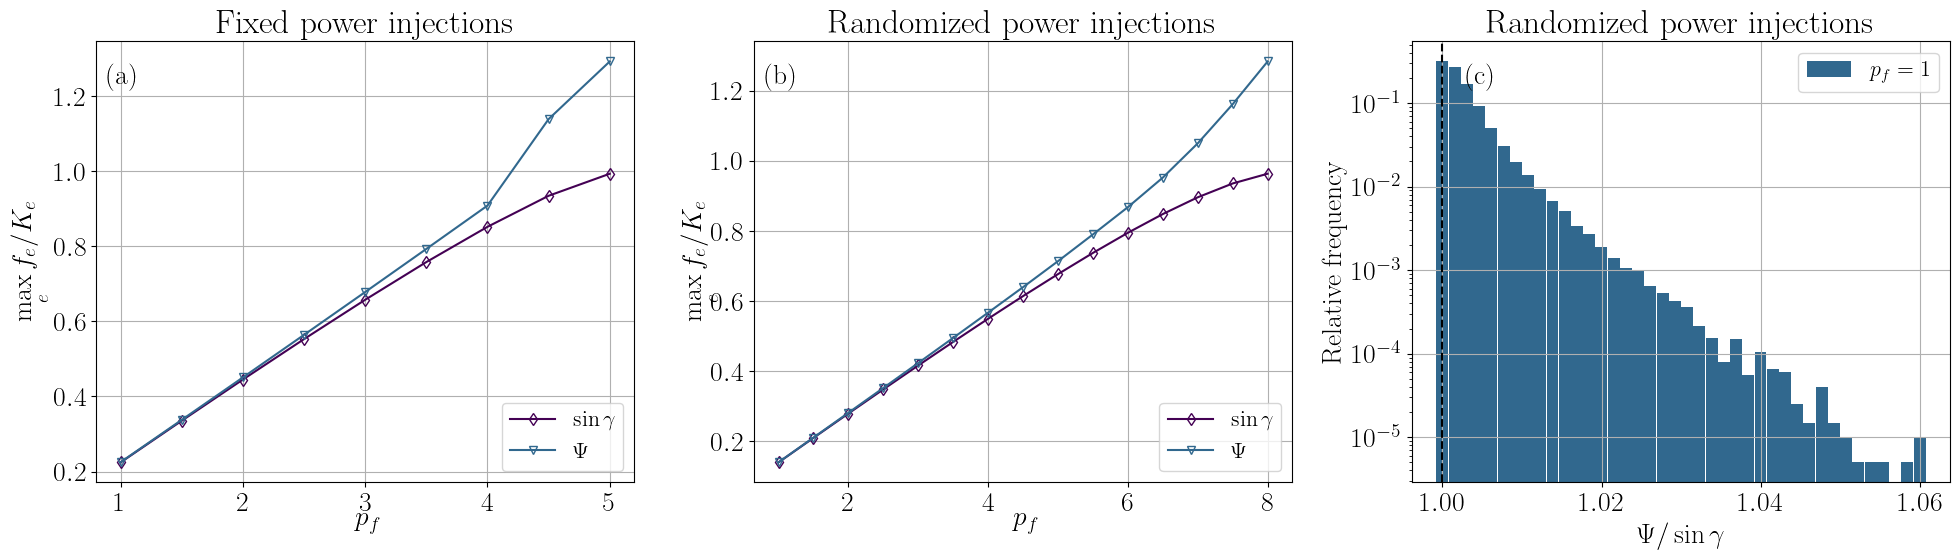

In [2]:
ctx = build_case_context(casenum=118)

# Panel (a): fast to calculate
pow_fac_list_a_118 = 1.0 + np.arange(0, 9) * 0.5
fig4a = compute_fig4a(ctx, pow_fac_list_a_118)
S1def = fig4a["S1"]
S2def = fig4a["S2"]

# Load data from files and compute data for panel (b)
pow_fac_list_b, avg_S1, avg_S2 = load_fig4b_avg_csv('data_for_plots/fig4b_avg_case118_pfmax8.00_Nsamples200.csv')

# Build histogram from precomputed loaded data
ratio = load_ratio_hist_csv(f"data_for_plots/ratio_case118_pf1.00_values200000.csv")
res = stats.relfreq(ratio, numbins=40, defaultreallimits=[float(np.min(ratio)), float(np.max(ratio))])
hist_x = res.lowerlimit + np.linspace(0, res.binsize * res.frequency.size, res.frequency.size)

# Plot Fig. 4 (a,b,c)
plot_Fig_4_panels(
    pow_fac_list_a=fig4a["pow_fac_list"],
    S1def_a=S1def,
    S2def_a=S2def,

    pow_fac_list_b=pow_fac_list_b,
    avg_S1s_b=avg_S1,
    avg_S2s_b=avg_S2,

    hist_x=hist_x,
    hist_freq=res.frequency,
    hist_binsize=res.binsize,

    panel_labels=("a", "b", "c"),
    filename="Fig4_lower2.pdf"
)

New version of figures (without middle plot) to save space:

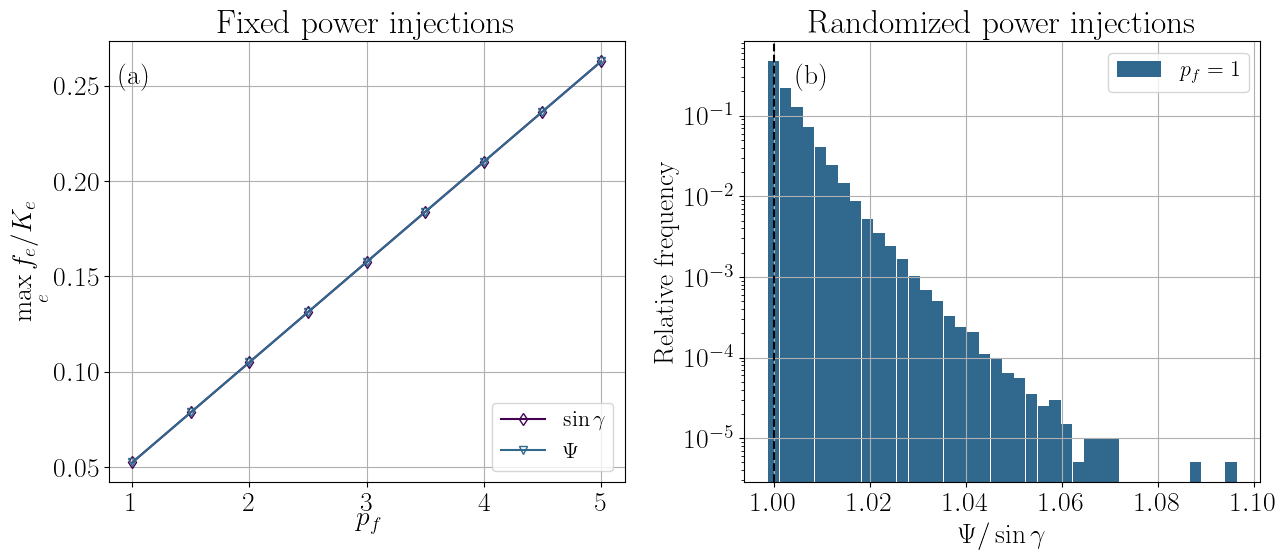

In [ ]:
ctx = build_case_context(casenum=30)

# Panel (a): fast to calculate
pow_fac_list_a_30 = 1.0 + np.arange(0, 9) * 0.5
fig4a = compute_fig4a(ctx, pow_fac_list_a_30)
S1def = fig4a["S1"]
S2def = fig4a["S2"]

# Build histogram from precomputed loaded data
ratio = load_ratio_hist_csv(f"data_for_plots/ratio_casecase30_pf1.00_values200000.csv")
res = stats.relfreq(ratio, numbins=40, defaultreallimits=[float(np.min(ratio)), float(np.max(ratio))])
hist_x = res.lowerlimit + np.linspace(0, res.binsize * res.frequency.size, res.frequency.size)

plot_Fig_4_panels_no_middle(
    # Panel (a): fixed power injections
    pow_fac_list_a_30,
    S1def,
    S2def,
    # Panel (c): histogram (pf = 1)
    hist_x,
    res.frequency,
    res.binsize,
    panel_labels=("a", "b"),
    filename="Fig4_case30.pdf"
)

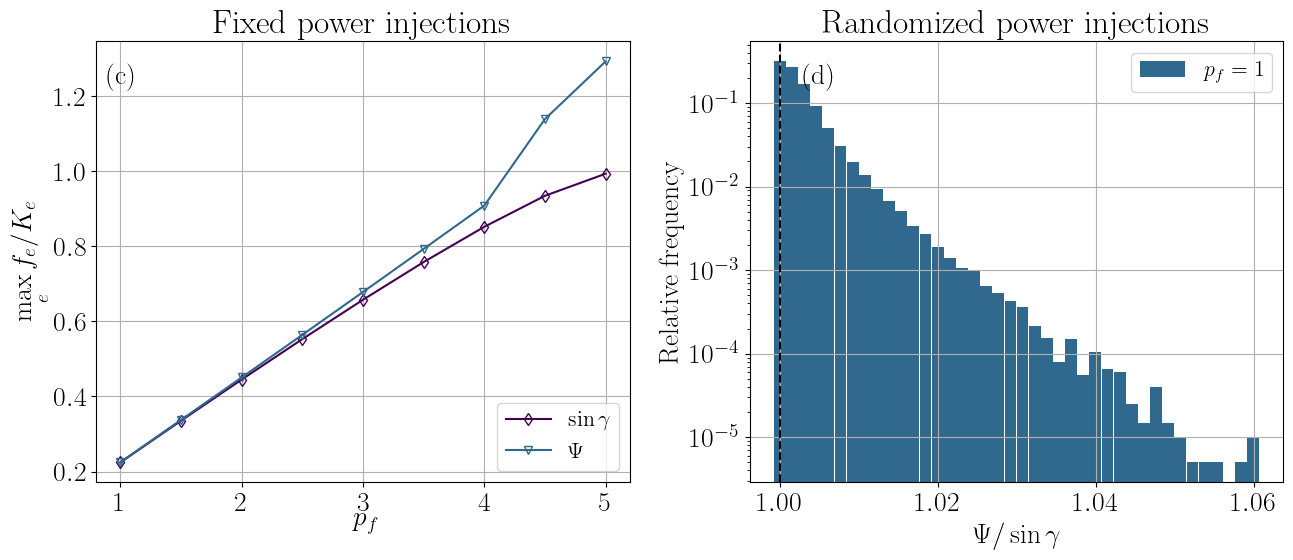

In [3]:
ctx = build_case_context(casenum=118)

# Panel (a): fast to calculate
pow_fac_list_a_118 = 1.0 + np.arange(0, 9) * 0.5
fig4a = compute_fig4a(ctx, pow_fac_list_a_118)
S1def = fig4a["S1"]
S2def = fig4a["S2"]

# Build histogram from precomputed loaded data
ratio = load_ratio_hist_csv(f"data_for_plots/ratio_case118_pf1.00_values200000.csv")
res = stats.relfreq(ratio, numbins=40, defaultreallimits=[float(np.min(ratio)), float(np.max(ratio))])
hist_x = res.lowerlimit + np.linspace(0, res.binsize * res.frequency.size, res.frequency.size)

plot_Fig_4_panels_no_middle(
    # Panel (a): fixed power injections
    pow_fac_list_a_118,
    S1def,
    S2def,
    # Panel (c): histogram (pf = 1)
    hist_x,
    res.frequency,
    res.binsize,
    panel_labels=("c", "d"),
    filename="Fig4_case118.pdf"
)

If you would like to manually generate the data, you could run this below:

In [7]:
%%script false --no-raise-error
ctx = build_case_context(casenum=30)

# Panel (b): randomized, save p_coeff_list to CSV because it can take longer to calculate this.
# Calculate a few more samples than needed if something goes wrong (so we try 230 runs and keep only 200 which certainly converged).
min_success = 230
trial_num = 10000
pow_fac_list_b_30 = 1.0 + np.arange(0, 19) * 0.5
p_coeff_list = compute_fig4b_coeffs(ctx, pow_fac_list=pow_fac_list_b_30, trial_num=trial_num, min_success=min_success, max_tries=10000, 
                                    norepeat=False)

# Save for later use
fname_pcoeff = save_p_coeff_list_csv_auto(p_coeff_list, case_name="case30", pow_fac_list=pow_fac_list_b_30)

# Panel (c): histogram at pf=1 
N_success = 200000
S1_hist, S2_hist, attempted = get_S1_S2_hist_pf1_target_success(ctx["net"], N_success=N_success, max_attempts=260000,
    E_matrix=ctx["E"], K_vec=ctx["K_vec"], norepeat=True, seed=1)

ratio = S2_hist / S1_hist
save_ratio_hist_csv_auto(ratio, case_name = "case30", pf = 1.0)

Figure 5: Now we proceed to study the impact of voltage stability on phase cohesiveness, 
and show the result for both Case 30 and Case 118.

In [8]:
all_v_mins30 = np.linspace(0.45, 1.0, 10000)
breaking_point30, upper_bound30, x30, theta_diff30 = calculate_impact_of_voltage_stability_on_phase_cohesiveness(pn.case30(), all_v_mins30)

all_v_mins118 = np.linspace(0.6, 1.0, 10000)
breaking_point118, upper_bound118, x118, theta_diff118 = calculate_impact_of_voltage_stability_on_phase_cohesiveness(pn.case118(), all_v_mins118)

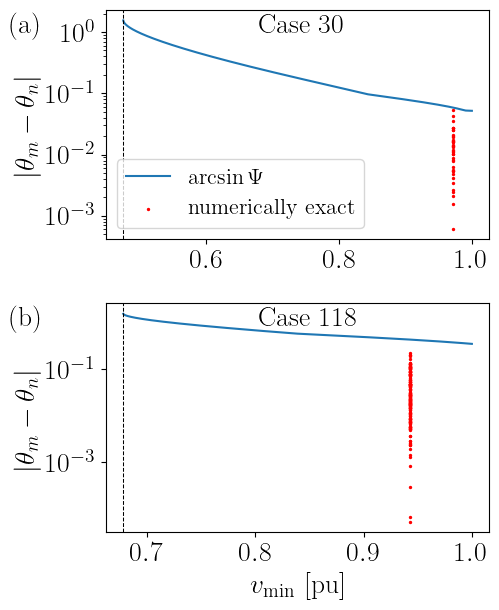

In [9]:
plot_Fig_5_two_cases(
    all_v_mins30, upper_bound30, x30, theta_diff30, breaking_point30,
    all_v_mins118, upper_bound118, x118, theta_diff118, breaking_point118,
    filename="Figure5.pdf")

Figure 6: error bounds with uncertain voltages for Case 30.

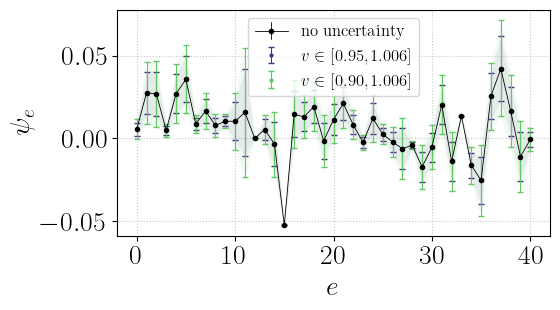

In [3]:
net, _, _, _, _, B, _, _ = construct_ppgraph_from_pandapower_and_run_pf(pn.case30())
vmax_30 = compute_v_max_from_B(net, B)
plot_error_bounds_with_uncertain_voltages(pow_fac = 1.0, v_range_a=(0.95, max(vmax_30)), v_range_b=(0.90, max(vmax_30)), casenum = 30, filename = "Fig5_small_ok.pdf")

We could do the same for Case 118:

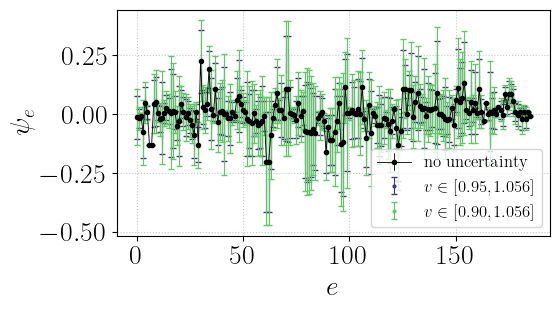

In [6]:
net, _, _, _, _, B, _, _ = construct_ppgraph_from_pandapower_and_run_pf(pn.case118())
vmax_118 = compute_v_max_from_B(net, B)
plot_error_bounds_with_uncertain_voltages(pow_fac = 1.0, v_range_a=(0.95, max(vmax_118)), v_range_b=(0.90, max(vmax_118)), casenum = 118, filename = None)